# Basic Calculation of Portfolio

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web
import datetime as dt

In [2]:
tickers = ['TSLA', 'XOM', 'JNJ', 'PG', 'ABBV', 'ALB', 'AMZN', 'BA', 'UNH', 'DEO']

start = dt.datetime(2017,1,2)
end = dt.datetime.today()

prices_df = web.DataReader(tickers, 'yahoo', start, end)['Adj Close']

In [2]:
returns_df = prices_df.pct_change()[1:] * 100

stocks_weights = [0.10, 0.05, 0.10, 0.30, 0.05, 0.10, 0.10, 0.05, 0.10, 0.05]

weighted_returns = returns_df * stocks_weights

portfolio_returns = weighted_returns.sum(axis=1)

print(portfolio_returns.head())

Date
2017-01-04    1.005191
2017-01-05    0.605267
2017-01-06    0.279562
2017-01-09   -0.219432
2017-01-10   -0.601394
dtype: float64


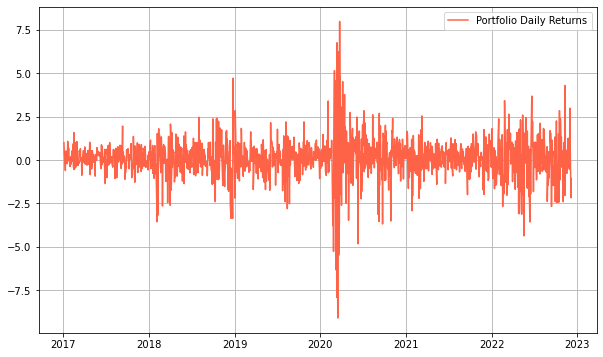

In [3]:
plt.figure(figsize=(10,6))
plt.plot(portfolio_returns, color = 'tomato', label = 'Portfolio Daily Returns')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [4]:
std_daily = portfolio_returns.std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

std_monthly = math.sqrt(21) * std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

std_annual = math.sqrt(252) * std_daily
print ('Annual volatility: ', '{:.2f}%'.format(std_annual))

Daily volatility:  1.16%
Monthly volatility:  5.30%
Annual volatility:  18.37%


In [5]:
from arch import arch_model

# GARCH Model with Normal Distribution

In [6]:
normal_garch_model = arch_model(portfolio_returns, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal')

normal_gm_result = normal_garch_model.fit(disp = 'off')

print(normal_gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1978.96
Distribution:                  Normal   AIC:                           3965.93
Method:            Maximum Likelihood   BIC:                           3987.16
                                        No. Observations:                 1492
Date:                Tue, Dec 06 2022   Df Residuals:                     1491
Time:                        18:42:21   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1083  2.038e-02      5.313  1.076e-07 [6.833e-0

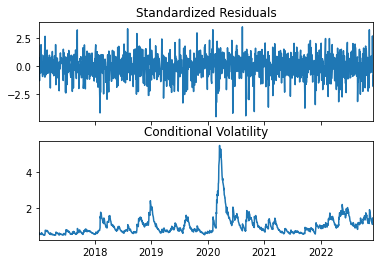

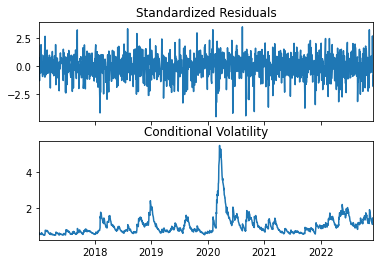

In [7]:
normal_gm_result.plot()

In [8]:
normal_resid = normal_gm_result.resid

normal_volatility = normal_gm_result.conditional_volatility

normal_std_resid = normal_gm_result.std_resid

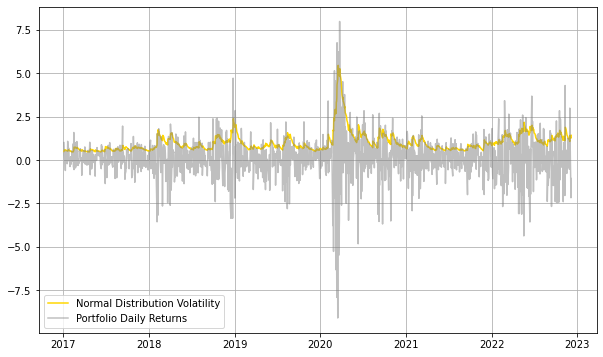

In [39]:
plt.figure(figsize=(10,6))
plt.plot(normal_volatility, color = 'gold', label = 'Normal Distribution Volatility')
plt.plot(portfolio_returns, color = 'grey', label = 'Portfolio Daily Returns', alpha = 0.5)
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

# GARCH with Skewed-t Ditribution

In [40]:
skewt_garch_model = arch_model(portfolio_returns, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')

skewt_gm_result = skewt_garch_model.fit(disp = 'off')

print(skewt_gm_result.summary())

                           Constant Mean - GARCH Model Results                           
Dep. Variable:                              None   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -1934.11
Distribution:      Standardized Skew Student's t   AIC:                           3880.23
Method:                       Maximum Likelihood   BIC:                           3912.08
                                                   No. Observations:                 1492
Date:                           Tue, Dec 06 2022   Df Residuals:                     1491
Time:                                   18:42:51   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

lambda is less than 0, which shows the distribution is negatively skewed.

In [42]:
skewt_resid = skewt_gm_result.resid

skewt_volatility = skewt_gm_result.conditional_volatility

skewt_std_resid = skewt_resid / skewt_volatility

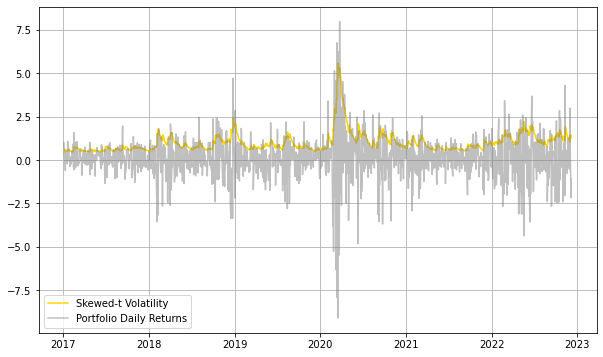

In [43]:
# Plot model fitting results
plt.figure(figsize=(10,6))
plt.plot(skewt_volatility, color = 'gold', label = 'Skewed-t Volatility')
plt.plot(portfolio_returns, color = 'grey', label = 'Portfolio Daily Returns', alpha = 0.5)
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

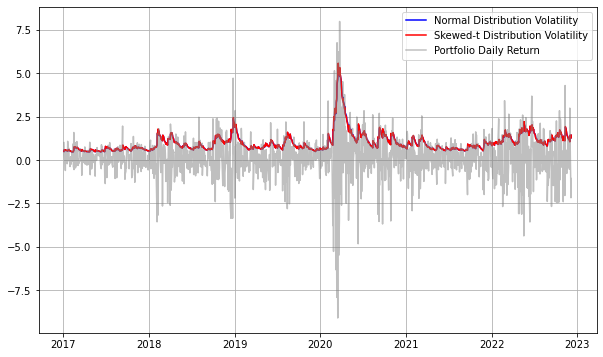

In [44]:
# Plot model volatility 
plt.figure(figsize=(10,6))
plt.plot(normal_volatility, color = 'blue', label = 'Normal Distribution Volatility')
plt.plot(skewt_volatility, color = 'red', label = 'Skewed-t Distribution Volatility')
plt.plot(portfolio_returns, color = 'grey', label = 'Portfolio Daily Return', alpha = 0.5)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

# GARCH with t-distribution

In [45]:
t_garch_model = arch_model(portfolio_returns, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 't')

t_gm_result = t_garch_model.fit(disp = 'off')

print(t_gm_result)

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1938.90
Distribution:      Standardized Student's t   AIC:                           3887.79
Method:                  Maximum Likelihood   BIC:                           3914.33
                                              No. Observations:                 1492
Date:                      Tue, Dec 06 2022   Df Residuals:                     1491
Time:                              18:43:15   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [46]:
t_resid = t_gm_result.resid

t_volatility = t_gm_result.conditional_volatility

t_std_resid = t_resid / t_volatility

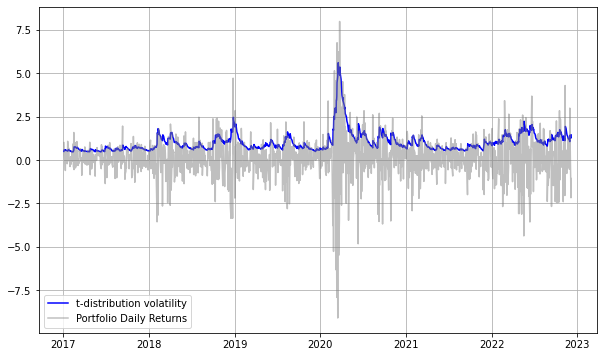

In [47]:
plt.figure(figsize=(10,6))
plt.plot(t_volatility, color = 'blue', label = 't-distribution volatility')
plt.plot(portfolio_returns, color = 'grey', label = 'Portfolio Daily Returns', alpha = 0.5)
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

# GARCH Model with AR mean

In [48]:
ar_mean_gm = arch_model(portfolio_returns, p = 1, q = 1, mean = 'AR', lags = 1, vol = 'GARCH', dist = 'normal')

ar_mean_result = ar_mean_gm.fit(disp = 'off')

print(ar_mean_result.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                   None   R-squared:                       0.006
Mean Model:                        AR   Adj. R-squared:                  0.006
Vol Model:                      GARCH   Log-Likelihood:               -1975.80
Distribution:                  Normal   AIC:                           3961.59
Method:            Maximum Likelihood   BIC:                           3988.13
                                        No. Observations:                 1491
Date:                Tue, Dec 06 2022   Df Residuals:                     1489
Time:                        18:43:19   Df Model:                            2
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.1108  2.069e-02      5.355  8.562e-08 

In [49]:
ar_mean_resid = ar_mean_result.resid

ar_mean_volatility = ar_mean_result.conditional_volatility

ar_mean_std_resid = ar_mean_result.std_resid

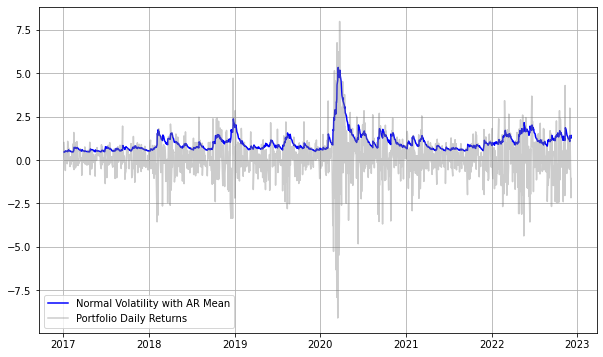

In [50]:
plt.figure(figsize=(10,6))
plt.plot(ar_mean_volatility, color = 'blue', label = 'Normal Volatility with AR Mean')
plt.plot(portfolio_returns, color = 'grey', label = 'Portfolio Daily Returns', alpha = 0.4)
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

# GJR-GARCH Model

In [51]:
gjr_garch_model = arch_model(portfolio_returns, p = 1, q = 1, o = 1, mean = 'constant', vol = 'GARCH')

gjr_gm_result = gjr_garch_model.fit(disp = 'off')

print(gjr_gm_result.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1971.23
Distribution:                  Normal   AIC:                           3952.46
Method:            Maximum Likelihood   BIC:                           3979.00
                                        No. Observations:                 1492
Date:                Tue, Dec 06 2022   Df Residuals:                     1491
Time:                        18:43:23   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0876  2.046e-02      4.281  1.862e-05 [4.748e-0

In [52]:
gjr_resid = gjr_gm_result.resid

gjr_volatility = gjr_gm_result.conditional_volatility

gjr_std_resid = gjr_gm_result.std_resid

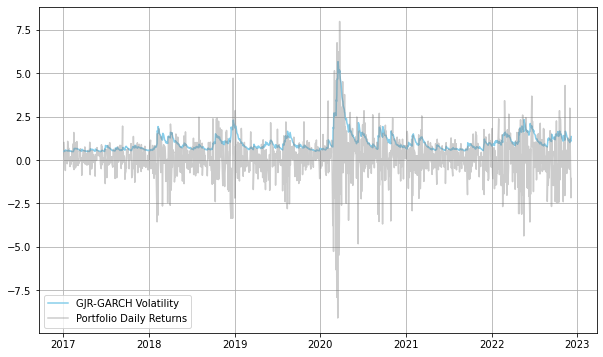

In [53]:
plt.figure(figsize=(10,6))
plt.plot(gjr_volatility, color = 'skyblue', label = 'GJR-GARCH Volatility')
plt.plot(portfolio_returns, color = 'grey', label = 'Portfolio Daily Returns', alpha = 0.4)
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

# EGARCH Model 

In [54]:
egarch_model = arch_model(portfolio_returns, p = 1, q = 1, o = 1, mean = 'constant', vol = 'EGARCH')

egarch_result = egarch_model.fit(disp = 'off')

print(egarch_result.summary())

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1973.06
Distribution:                  Normal   AIC:                           3956.11
Method:            Maximum Likelihood   BIC:                           3982.65
                                        No. Observations:                 1492
Date:                Tue, Dec 06 2022   Df Residuals:                     1491
Time:                        18:43:26   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0875  2.090e-02      4.187  2.825e-05 [4.656e-0

In [55]:
egarch_resid = egarch_result.resid

egarch_volatility = egarch_result.conditional_volatility

egarch_std_resid = egarch_result.std_resid

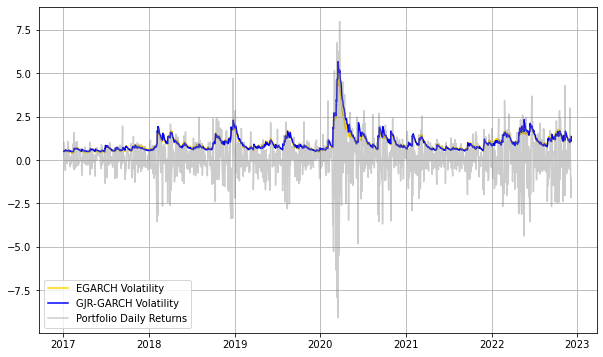

In [56]:
plt.figure(figsize=(10,6))
plt.plot(egarch_volatility, color = 'gold', label = 'EGARCH Volatility')
plt.plot(gjr_volatility, color = 'blue', label = 'GJR-GARCH Volatility')
plt.plot(portfolio_returns, color = 'grey', label = 'Portfolio Daily Returns', alpha = 0.4)
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

# Simplify the Model with p-values

In [115]:
normal_gm_param_summary = pd.DataFrame({'parameter': normal_gm_result.params, 
                                        'p-value': normal_gm_result.pvalues, 
                                        't-statistic': normal_gm_result.tvalues})

print(normal_gm_param_summary)

          parameter        p-value  t-statistic
mu         0.108271   1.075573e-07     5.313470
omega      0.017743   1.789991e-02     2.367682
alpha[1]   0.119370   1.924161e-07     5.206519
beta[1]    0.870882  3.097860e-262    34.594111


H0: parameter value = 0

All parameters' p-values are less than significance level (5%)

Reject null hypothesis, all parameters are statistically significant

All absolute t-values are larger than 2, reject null hypothesis, keep all parameters in the Normal Distribution GARCH model

In [58]:
skewt_gm_param_summary = pd.DataFrame({'parameter': skewt_gm_result.params, 
                                       'p-value': skewt_gm_result.pvalues, 
                                       't-statistic': skewt_gm_result.tvalues})

print(skewt_gm_param_summary)

          parameter        p-value  t-statistic
mu         0.104546   5.674341e-08     5.428771
omega      0.019934   4.411074e-03     2.847163
alpha[1]   0.129228   1.322063e-08     5.683189
beta[1]    0.860644  4.581168e-308    37.518607
eta        5.892542   2.523812e-14     7.620660
lambda    -0.111445   1.762966e-03    -3.127505


H0: parameter value = 0

All parameters' p-values are less than significance level (5%)

Reject null hypothesis, all parameters are statistically significant

All absolute t-values are larger than 2, reject null hypothesis, keep all parameters in the Skewed-t distribution GARCH model

In [114]:
t_gm_param_summary = pd.DataFrame({'parameter': t_gm_result.params, 
                                   'p-value': t_gm_result.pvalues, 
                                   't-statistic': t_gm_result.tvalues})

print(t_gm_param_summary)

          parameter       p-value  t-statistic
mu         0.124426  7.341153e-12     6.850852
omega      0.019579  4.779807e-03     2.821511
alpha[1]   0.129895  9.629915e-09     5.737122
beta[1]    0.861981  0.000000e+00    38.628517
nu         5.647070  3.932998e-15     7.857046


H0: parameter value = 0

All parameters' p-values are less than significance level (5%)

Reject null hypothesis, all parameters are statistically significant

All absolute t-values are larger than 2, reject null hypothesis, keep all parameters in the t-distribution GARCH model

In [60]:
from statsmodels.graphics.tsaplots import plot_acf

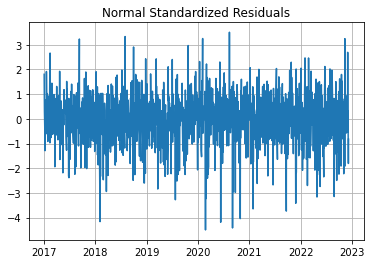

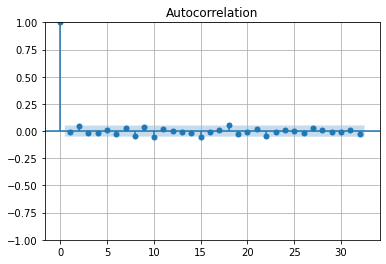

In [61]:
plt.plot(normal_std_resid)
plt.title('Normal Standardized Residuals')
plt.grid(True)
plt.show()

plot_acf(normal_std_resid, alpha = 0.05)
plt.grid(True)
plt.show()

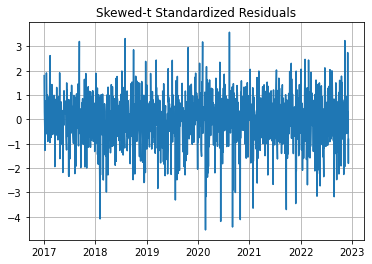

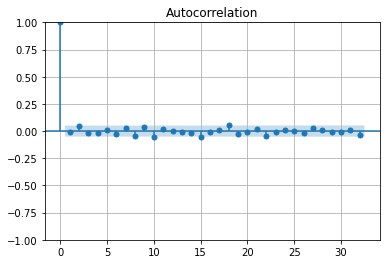

In [62]:
plt.plot(skewt_std_resid)
plt.title('Skewed-t Standardized Residuals')
plt.grid(True)
plt.show()

plot_acf(skewt_std_resid, alpha = 0.05)
plt.grid(True)
plt.show()

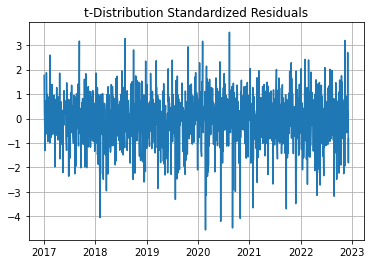

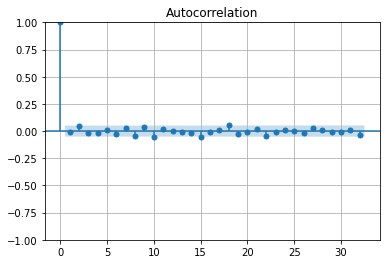

In [63]:
plt.plot(t_std_resid)
plt.title('t-Distribution Standardized Residuals')
plt.grid(True)
plt.show()

plot_acf(t_std_resid, alpha = 0.05)
plt.grid(True)
plt.show()

The ACF plot shows the majority of the data points are within the confidence interval, so the model is doing a decent job.

# Ljung-Box Test

In [64]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [65]:
ljungbox_test = acorr_ljungbox(normal_std_resid , lags = 10, return_df = True)

print('P-values are: ', ljungbox_test.iloc[0,1])

P-values are:  0.6607323812286737


H0: the data is independently distributed

All the p-values are larger than 5% so the null hypothesis cannot be rejected. In other words, no autocorrelations detected and the model is doing a decent job.

In [66]:
ljungbox_test = acorr_ljungbox(skewt_std_resid , lags = 10, return_df = True)

print('P-values are: ', ljungbox_test.iloc[0,1])

P-values are:  0.6722698528493227


H0: the data is independently distributed

All the p-values are larger than 5% so the null hypothesis cannot be rejected. In other words, no autocorrelations detected and the model is valid.

In [67]:
ljungbox_test = acorr_ljungbox(t_std_resid , lags = 10, return_df = True)

print('P-values are: ', ljungbox_test.iloc[0,1])

P-values are:  0.665919237213025


*H0: the data is independently distributed*

**All the p-values are larger than 5% so the null hypothesis cannot be rejected. In other words, no autocorrelations detected and the model is doing a decent job.**

# Godness of Fit

In [113]:
print('Log-likelihood of Normal GARCH :', normal_gm_result.loglikelihood)

print('Log-likelihood of t GARCH :', t_gm_result.loglikelihood)

Log-likelihood of Normal GARCH : -1978.963037731605
Log-likelihood of t GARCH : -1938.8969668074853


**The GARCH model with skewed Student's t-distribution assumption has a higher log-likelihood, hence is relatively better.**

In [112]:
print('AIC of Normal GARCH model :', normal_gm_result.aic)

print('AIC of Student t GARCH model :', t_gm_result.aic)

print('BIC of Normal GARCH model :', normal_gm_result.bic)

print('BIC of Student t GARCH model :', t_gm_result.bic)

AIC of Normal GARCH model : 3965.92607546321
AIC of Student t GARCH model : 3887.7939336149707
BIC of Normal GARCH model : 3987.1575665862647
BIC of Student t GARCH model : 3914.333297518789


**Both AIC and BIC of the Student t GARCH model are lower, hence student t-distribution model is relatively better.**

# Backtesting with MAE, MSE

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [72]:
def evaluate(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae = mean_absolute_error(observation, forecast)
    print(f'Mean Absolute Error (MAE): {round(mae,3)}')
    
    # Call sklearn function to calculate MSE
    mse = mean_squared_error(observation, forecast)
    print(f'Mean Squared Error (MSE): {round(mse,3)}')
    return mae, mse

# Backtest model with MAE, MSE
evaluate(portfolio_returns.sub(portfolio_returns.mean()).pow(2), skewt_volatility**2)

Mean Absolute Error (MAE): 1.402
Mean Squared Error (MSE): 14.102


(1.402422922036021, 14.102116442372889)

# Simulating Forecasts

## Bootstrap Forecast

In [74]:
from arch.__future__ import reindexing

In [75]:
# The paths for the final observation
sim_forecasts = skewt_gm_result.forecast(horizon=5, method='simulation')
sim_paths = sim_forecasts.simulations.residual_variances[-1].T
sim = sim_forecasts.simulations

bs_forecasts = skewt_gm_result.forecast(horizon=5, method='bootstrap')
bs_paths = bs_forecasts.simulations.residual_variances[-1].T
bs = bs_forecasts.simulations

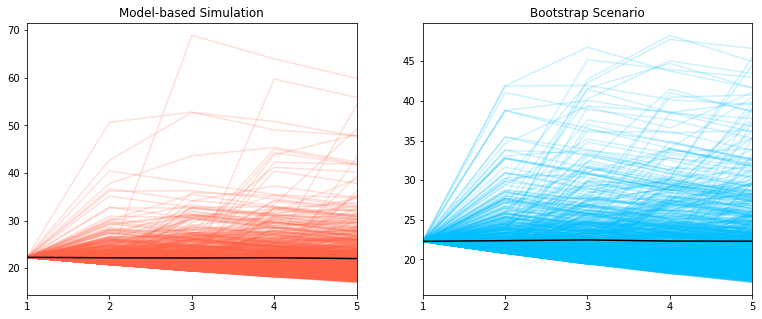

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))

x = np.arange(1, 6)

# Plot the paths and the mean, set the axis to have the same limit
axes[0].plot(x, np.sqrt(252 * sim_paths), color='tomato', alpha=0.2)
axes[0].plot(x, np.sqrt(252 * sim_forecasts.residual_variance.iloc[-1]),
    color='k', alpha=1)

axes[0].set_title('Model-based Simulation')
axes[0].set_xticks(np.arange(1, 6))
axes[0].set_xlim(1, 5)

axes[1].plot(x, np.sqrt(252 * bs_paths), color='deepskyblue', alpha=0.2)
axes[1].plot(x,np.sqrt(252 * bs_forecasts.residual_variance.iloc[-1]),
    color='k', alpha=1)

axes[1].set_xticks(np.arange(1, 6))
axes[1].set_xlim(1, 5)

axes[1].set_title('Bootstrap Scenario')
plt.show()

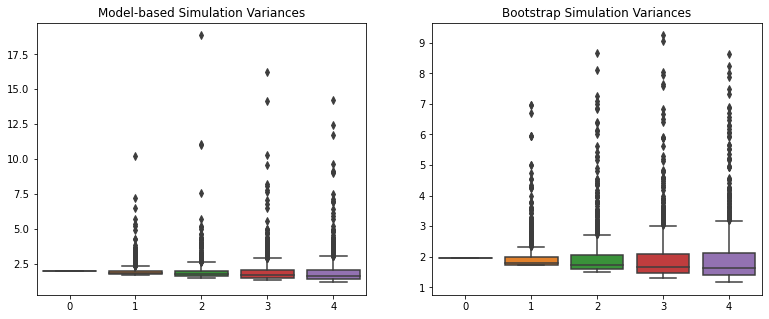

In [77]:
# Plot Simulation Variances
fig, axes = plt.subplots(1, 2, figsize=(13,5))

sns.boxplot(data=sim.variances[-1], ax=axes[0])
sns.boxplot(data=bs.variances[-1], ax=axes[1])

axes[0].set_title('Model-based Simulation Variances')
axes[1].set_title('Bootstrap Simulation Variances')

plt.show()

# VaR

## Parametric VaR

In [103]:
am = arch_model(portfolio_returns, p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')
res = am.fit(disp='off', last_obs='2018-01-01')

forecasts = res.forecast(start='2019-01-01')
cond_mean = forecasts.mean['2019-01-01':]
cond_var = forecasts.variance['2019-01-01':]
q = am.distribution.ppf([0.01, 0.05], res.params[5])
print(q)

[-2.46548085 -1.62276693]


# Dynamic Beta

In [31]:
sp500 = DataReader('^GSPC', 'yahoo', '2017-01-01', '2022-12-01')

In [32]:
sp500['Return'] = sp500['Adj Close'].pct_change() * 100

In [97]:
sp500_garch_model = arch_model(sp500['Return'].dropna(), p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')

sp500_gm_result = sp500_garch_model.fit(disp = 'off')

sp500_std_resid = sp500_gm_result.std_resid

vol_sp500 = sp500_gm_result.conditional_volatility

vol_portfolio = skewt_gm_result.conditional_volatility

In [98]:
correlation = np.corrcoef(skewt_std_resid, sp500_std_resid)[0, 1]

stock_beta = correlation * (vol_portfolio / vol_sp500)

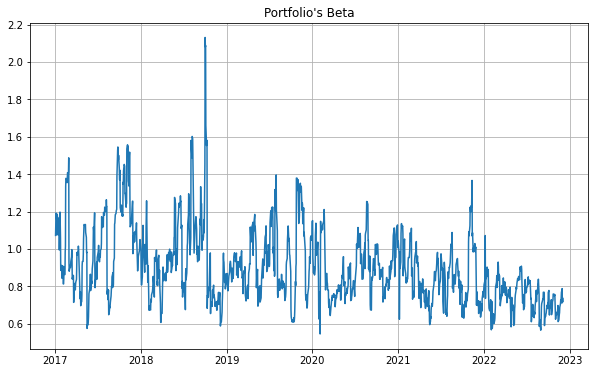

In [144]:
plt.figure(figsize = (10,6))
plt.plot(stock_beta)
plt.title("Portfolio's Beta")
plt.grid(True)
plt.show()